# Perbandingan Performa dari Single vs Ensemble Learning dalam Memprediksi Tumbuhan Apa yang Cocok untuk Ditanam berdasarkan Faktor Kondisi Lingkungan Penanaman

#### Nama&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: Steven Adi Suryanto
#### NIM&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: A11.2022.14623
#### Mata Kuliah&nbsp;: Pembelajaran Mesin (A11.4419)


**Berikut hal yang perlu diperhatikan dalam projek ini:**
- *single learning* yang saya maksud dalam projek ini adalah semua learning technique selain ensemble dan deep learning. Misalnya, sebuah decision tree classifier merupakan single learning.  

## Ringkasan dan Permasalahan

Projek ini didorong atas keinginan untuk membuktikan apakah ensemble learning memang dapat memberikan performa yang jauh lebih baik ketimbang single learning.

Pembahasan projek lebih ke arah teknik machine learning ketimbang domain permasalahan. Teknik machine learning yang dipakai adalah ensemble learning (khususnya bagging dan boosting) dan single learning. 

Projek berfokus pada pencarian algoritma yang paling bagus dalam memprediksi tumbuhan berdasarkan parameter yang ada.


## Tujuan
Mengetahui model apa yang lebih baik antara yang menggunakan single learning atau yang dengan ensemble learning dalam memprediksi kelompok tumbuhan. 


## Alur penyelesaian 
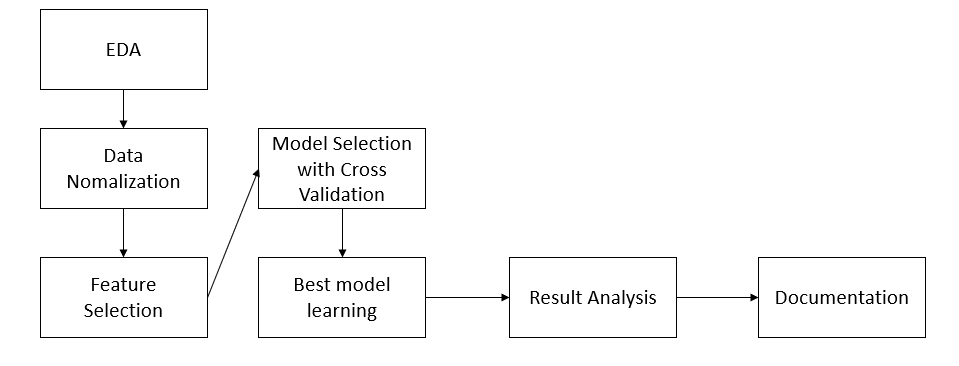

## Penjelasan Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Crop_recommendation.csv")

dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


**Keterangan**
1. N - rasio kandungan Nitrogen dalam tanah
2. P - rasio kandungan Fosfor dalam tanah
3. K - rasio kandungan Kalium dalam tanah
4. temperature - suhu dalam derajat Celcius
5. humidity - kelembaban relatif dalam%
6. ph - nilai ph tanah
7. rainfall - curah hujan dalam mm
8. label – jenis tumbuhan

## EDA

In [3]:
dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


Dilihat dari bagian mean, rainfall memiliki skala angka terbesar dibanding field yang lain. Hal ini menandakan bahwa perlu adanya normalisasi data agar efek rainfall tidak mendominasi field yang lain (terutama ph yang memiliki skala terkecil).

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Terlihat bahwa dataset yang didapat sudah tidak terdapat missing value

Dilihat dari visualisasi distribusi nilai pada setiap kolom di halaman Kaggle untuk dataset yang dipakai, nilai K tampak memiliki noise (> 100).

In [5]:
dataset.loc[dataset["K"]>100]["label"].unique()

array(['grapes', 'apple'], dtype=object)

Ternyata hanya label grapes dan apple saja yang memiliki nilai K > 100. Hal ini bisa menandakan bahwa nilai K yang >100 bukanlah sebuah noise karena nilai itu memang sebagai pembeda antara grapes dan apple dengan jenis tumbuhan lainnya.

In [6]:
print("Jumlah baris untuk apple dan grape dengan K < 100: {} baris".format(dataset[(dataset["label"].isin(["apple", "grape"])) & (dataset["K"] < 100)].shape[0]))     

Jumlah baris untuk apple dan grape dengan K < 100: 0 baris


## Data preprocessing

### Data Normalization

In [7]:
X = dataset.iloc[:, :len(dataset.columns)-1]
y = dataset["label"]

In [8]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

scaled_dataset = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
scaled_dataset["label"] = dataset["label"]

scaled_dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,0.361084,0.345448,0.215745,0.481798,0.667536,0.461053,0.299094
std,0.263695,0.235613,0.253240,0.145302,0.259716,0.120357,0.197444
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150000,0.164286,0.075000,0.400108,0.536653,0.383641,0.159298
50%,0.264286,0.328571,0.135000,0.481294,0.772424,0.454143,0.268211
75%,0.601786,0.450000,0.220000,0.566315,0.882960,0.531681,0.373834
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
X_scaled = scaled_dataset.iloc[:, :len(dataset.columns)-1]
y_scaled = scaled_dataset["label"].values.flatten()

### Feature Selection

In [10]:
from sklearn.feature_selection import SelectKBest
from pandas import DataFrame

selector = SelectKBest(k="all")

selector.fit(X_scaled, y_scaled)

feature_scores = pd.DataFrame(columns=["feature", "important_score"])

for i in range(len(selector.scores_)):
    feature_scores.loc[len(feature_scores)] = {'feature': X_scaled.columns[i], "important_score":selector.scores_[i]}
    
feature_scores


,feature,important_score
0,N,897.568186
1,P,1885.657859
2,K,27238.362067
3,temperature,102.186981
4,humidity,3103.708891
5,ph,60.344034
6,rainfall,605.527966


Meskipun hanya K, humidity, dan P adalah faktor yang paling berpengaruh, semua parameter akan tetap dipakai. Hal ini berdasarkan beberapa literatur yang menuliskan bahwa ketujuh faktor tersebut memang berpengaruh. 

Ambil saja contoh ph (important_score terendah).Jenis tumbuhan yang ada di dataset tidak memperdulikan ph, atau ph antar tumbuhan sama. Tapi secara lebih luas, terdapat tumbuhan yang hidup dalam kondisi ph ekstrim (<5.5 atau >8) yang tidak terdapat pada dataset, contohnya blueberry (**Sumber:** https://www.canr.msu.edu/news/soil_test_before_you_plant_blueberries)

## Modelling

Algorithms:
1. Decision Tree
2. NearestNeighbor
3. LogisticRegressor
4. SVC

Metrics:
1. Accuracy

Ensemble techniques:
1. Bagging
2. AdaBoost

### Model Selection ( dengan Cross Validation )

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

single_models = [
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    LogisticRegression(),
    SVC() 
]

In [12]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=21)

for model in single_models:
    scores = cross_val_score(model, X_scaled, y_scaled, cv=cv, scoring='accuracy')
    print(f"{model.__class__.__name__} accuracy: {scores.mean()}")

DecisionTreeClassifier accuracy: 0.9818181818181818
KNeighborsClassifier accuracy: 0.9796969696969697
LogisticRegression accuracy: 0.9324242424242424
SVC accuracy: 0.9836363636363636


In [13]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

ensemble_models = [
    AdaBoostClassifier(estimator=DecisionTreeClassifier(),learning_rate=0.2, n_estimators = 50),
    BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators = 30),
    BaggingClassifier(estimator=KNeighborsClassifier(),n_estimators = 30),
    BaggingClassifier(estimator=LogisticRegression(),n_estimators = 30),
    BaggingClassifier(estimator=SVC(),n_estimators = 30)
]

In [14]:
for model in ensemble_models:
    scores = cross_val_score(model, X_scaled, y_scaled, cv=cv, scoring='accuracy')
    print(f"{model.__class__.__name__}({model.estimator}): {scores.mean()}")

d:\UrusanKuliah\Perkuliahan\Semester_4\MachineLearning\tugas\Praktikum\matkul_machine_learning\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\UrusanKuliah\Perkuliahan\Semester_4\MachineLearning\tugas\Praktikum\matkul_machine_learning\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\UrusanKuliah\Perkuliahan\Semester_4\MachineLearning\tugas\Praktikum\matkul_machine_learning\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\UrusanKuliah\Perkuliahan\Semester_4\MachineLea

AdaBoostClassifier(DecisionTreeClassifier()): 0.9824242424242424
BaggingClassifier(DecisionTreeClassifier()): 0.9906060606060606
BaggingClassifier(KNeighborsClassifier()): 0.9833333333333332
BaggingClassifier(LogisticRegression()): 0.9315151515151516
BaggingClassifier(SVC()): 0.9842424242424244


Dari hasil cross validation diatas, bisa teknik bagging dengan menggunakan Decision Tree sebagai base estimatornya menghasilkan performa terbaik yaitu 99.06% accuracy.

### Model Learning + Performa Model

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

best_model = BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators = 20)

best_model.fit(X_train, y_train)

prediction = best_model.predict(X_test)
print(f"Akurasi {model.__class__.__name__}({model.estimator}): {accuracy_score(prediction, y_test)}")

Akurasi BaggingClassifier(SVC()): 0.9893939393939394


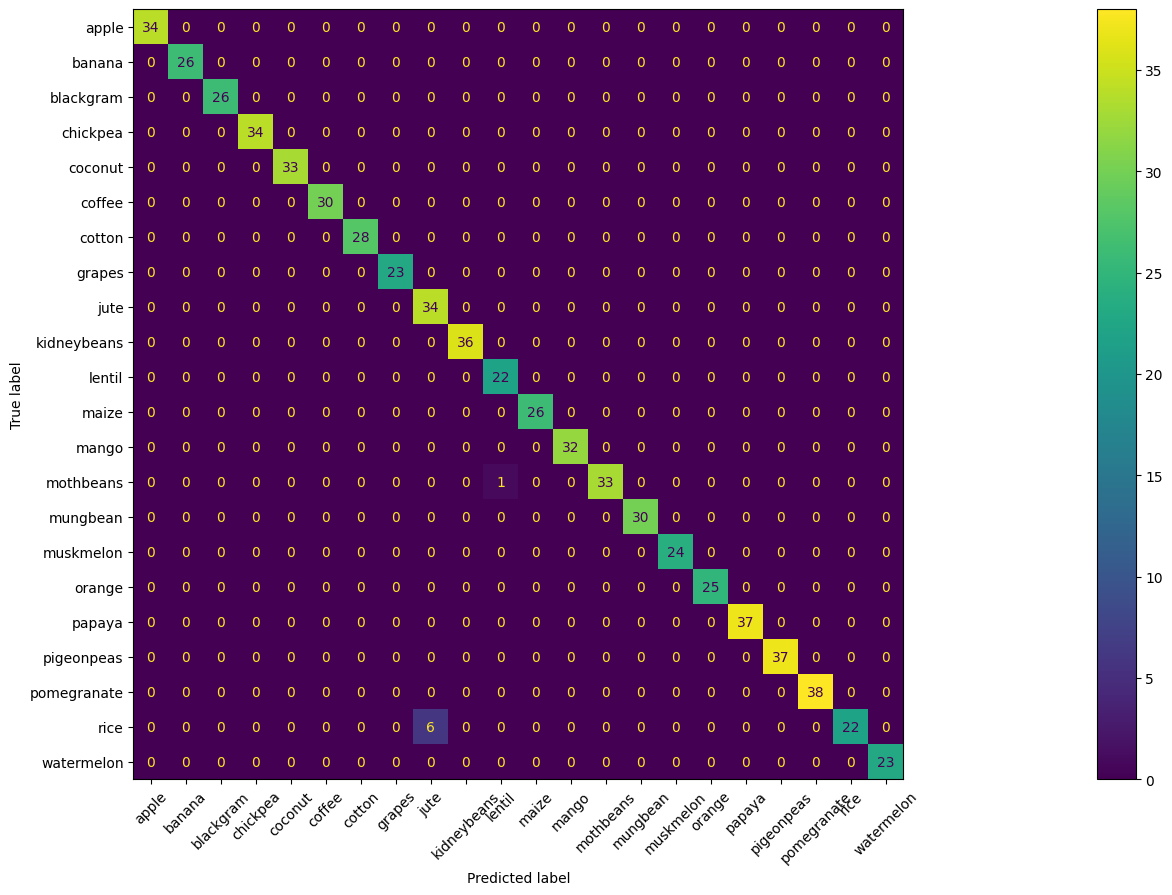

In [16]:
cm = confusion_matrix(y_test, prediction, labels=best_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

fig, ax = plt.subplots(figsize=(50, 10))

disp.plot(ax=ax)

plt.xticks(rotation=45)

plt.show()

## Diskusi Hasil dan Kesimpulan

Dilihat dari hasil percobaan di atas, single learning dengan ensemble learning sama sama menghasilkan performa yang sangat baik. 
Hal yang menarik ialah bahwa keduanya tidak memberikan perbedaan yang signifikan. Hal ini mungkin disebabkan oleh dataset yang masing-masing tumbuhannya memiliki karakteristik yang jelas.

Meskipun begitu, performa tetap terbaik diberikan oleh teknik Bagging **(ensemble learning)** dengan menggunakan Decision Tree sebagai base estimatornya, dengan banyak estimator 30, yaitu nilai accuracy 98.94%.


Maka dari itu, single learning dapat memiliki performa yang tidak jauh beda dengan ensemble learning meskipun ensemble tetap memberikan performa yang lebih baik.
